In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



In [2]:
file_path = 'C://Users//Chick//AI-class//BP_data.csv'  
df = pd.read_csv(file_path)

In [3]:
df
# 환자고유번호, 정상혈압, 헤모글로빈수치, 유전적(가족력) 여부, 나이, bmi, 성별, 임신여부, 흡연여부, 신체활동수, 염분수치, 알콜섭취량, 스트레스수치, 만성 질환, 갑상선장애부부

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


Text(0.5, 1.0, 'Diabetes')

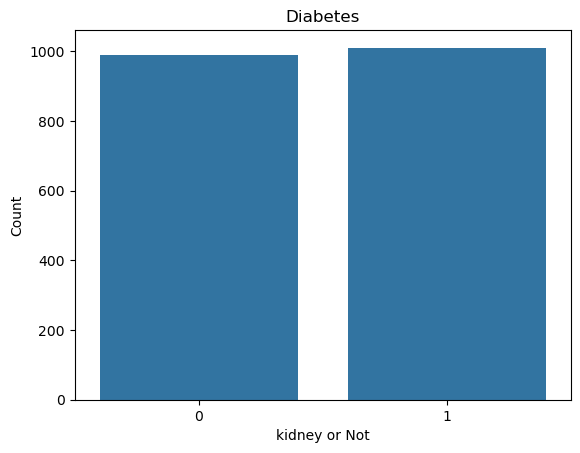

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Chronic_kidney_disease")
plt.xlabel("kidney or Not")
plt.ylabel("Count")
plt.title("Diabetes")


In [5]:
# 레이블 갯수 확인 (숫자)
df['Chronic_kidney_disease'].value_counts()


Chronic_kidney_disease
1    1010
0     990
Name: count, dtype: int64

In [6]:
# 결측치 확인
df.isnull().sum()
# gpt에 결측치를 다른값으로 대체하는 함수 보여줘


Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [7]:
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].median())
df['Pregnancy']=df['Pregnancy'].fillna(0)
# 헤모글로빈 수치, 알콜섭취량 등 - 중앙값으로 대체
# 임신 여부 - 0으로 대체(무응답=임신x라고 여겨짐)

In [8]:
df.isnull().sum()


Patient_Number                    0
Blood_Pressure_Abnormality        0
Level_of_Hemoglobin               0
Genetic_Pedigree_Coefficient     92
Age                               0
BMI                               0
Sex                               0
Pregnancy                         0
Smoking                           0
Physical_activity                 0
salt_content_in_the_diet          0
alcohol_consumption_per_day       0
Level_of_Stress                   0
Chronic_kidney_disease            0
Adrenal_and_thyroid_disorders     0
dtype: int64

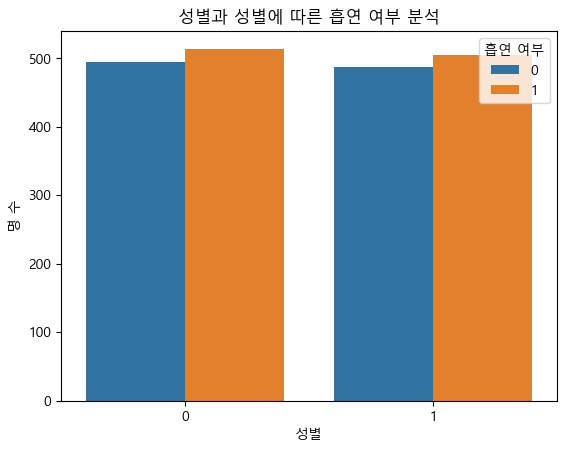

In [9]:
#성별과 성별에 따른 흡연 여부를 보여주는 카운트함수
import seaborn as sns
import matplotlib.pyplot as plt 

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

sns.countplot(x= 'Sex', hue='Smoking',  data=df)
plt.title("성별과 성별에 따른 흡연 여부 분석")
plt.xlabel("성별")
plt.ylabel("명 수")
plt.legend(title="흡연 여부")
plt.show()

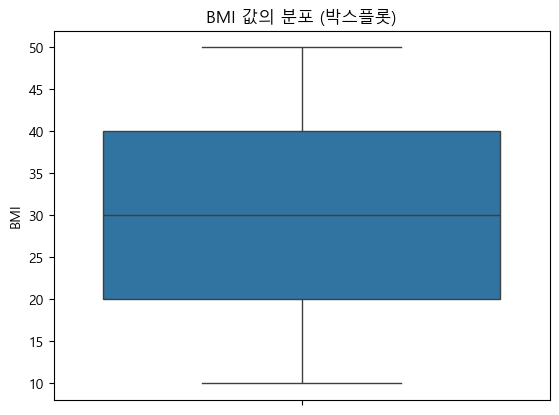

In [10]:
# gpt에 박스플롯으로 특정칼럼의 범위를 보여주는 코드

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 예: DataFrame 로드
# df = pd.read_csv('your_file.csv')  # 필요시 사용

# 특정 컬럼 박스플롯
sns.boxplot(y='BMI', data=df)
plt.title("BMI 값의 분포 (박스플롯)")
plt.ylabel("BMI")
plt.show()

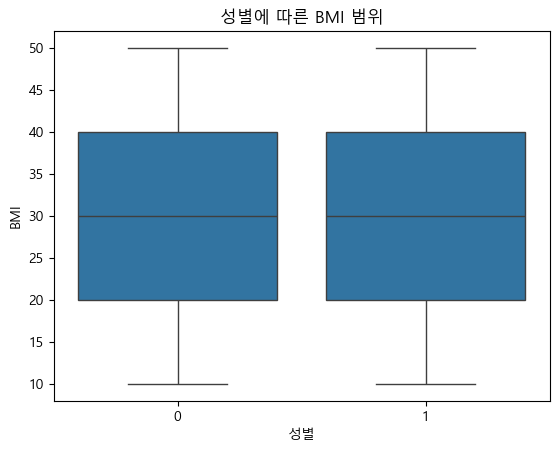

In [11]:
sns.boxplot(x='Sex', y='BMI', data=df)
plt.title("성별에 따른 BMI 범위")
plt.xlabel("성별")
plt.ylabel("BMI")
plt.show()

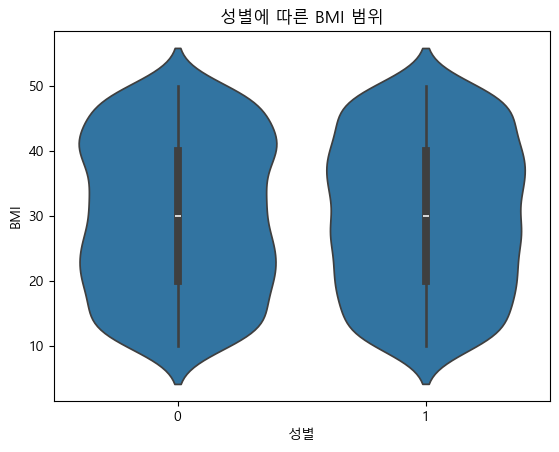

In [67]:
# boxplot은 범위를 볼 때, countplot은 레이블별로 개수를 볼 때 사용함 
# violinplot
sns.violinplot(x='Sex', y='BMI', data=df)
plt.title("성별에 따른 BMI 범위")
plt.xlabel("성별")
plt.ylabel("BMI")
plt.show()

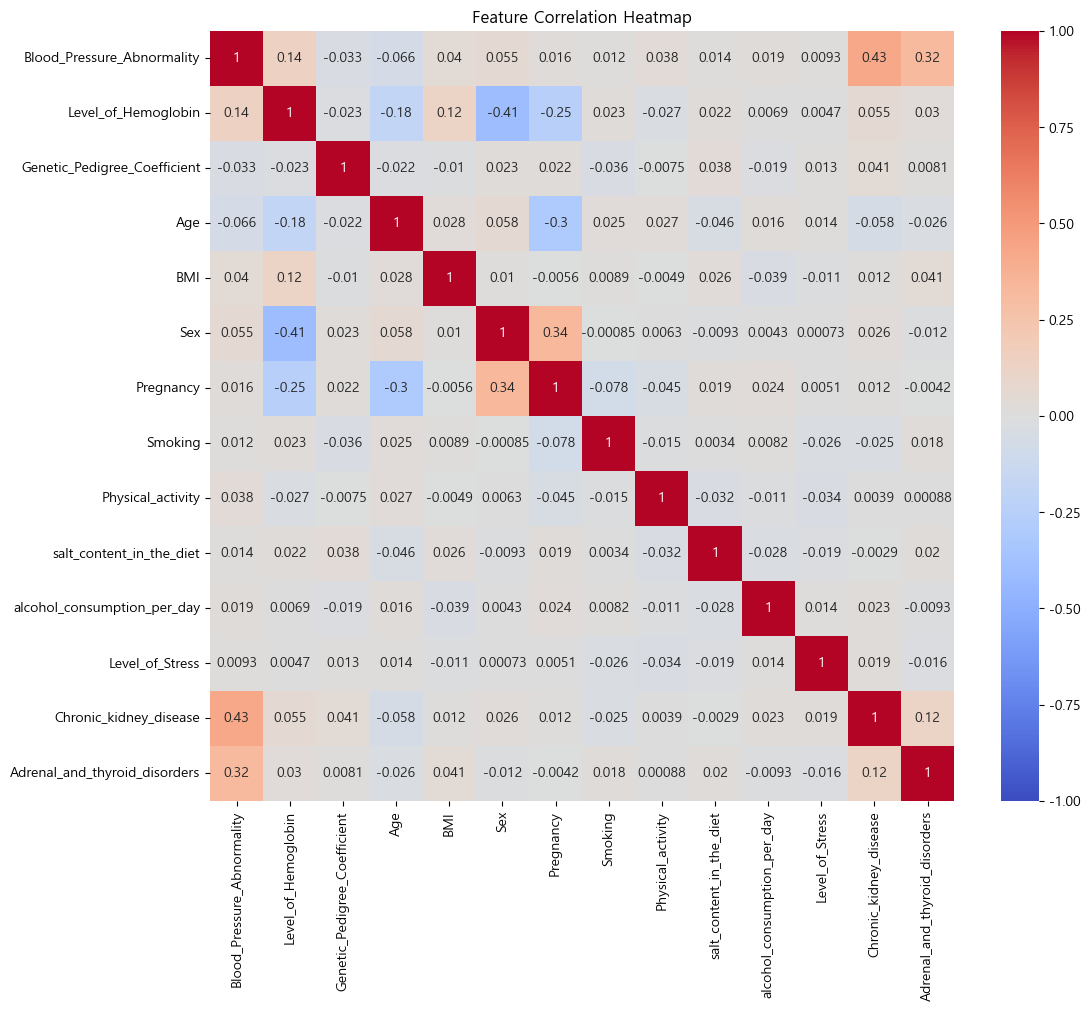

In [71]:
# heatmap: 상관관계 (혈압-유전력)
df2 = df.drop(columns=['Patient_Number'])
df2 = df2.fillna(df2.mean())
corr = df2.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Feature Correlation Heatmap")
plt.show()

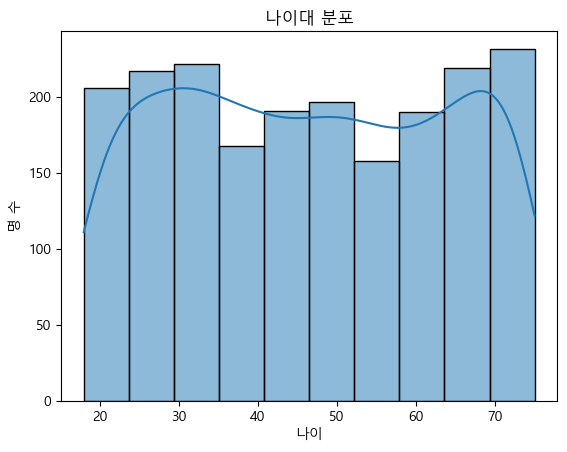

In [14]:
# 특정컬럼의 histplot을 봐보기 : 나이대 분포
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 나이 분포 히스토그램
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title("나이대 분포")
plt.xlabel("나이")
plt.ylabel("명 수")
plt.show()

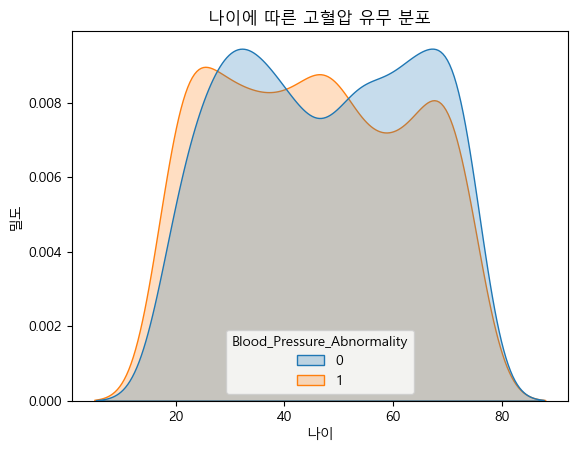

In [81]:
# kdeplot, displot은 집에서 해보기 
# 산점도 교재 98p~ (나이에 따른 고혈압의 증가, 나이에 따른 Bmi의 증가율)
sns.kdeplot(data=df, x="Age", hue="Blood_Pressure_Abnormality", fill=True)

plt.title('나이에 따른 고혈압 유무 분포')
plt.xlabel("나이")
plt.ylabel("밀도")
plt.show()

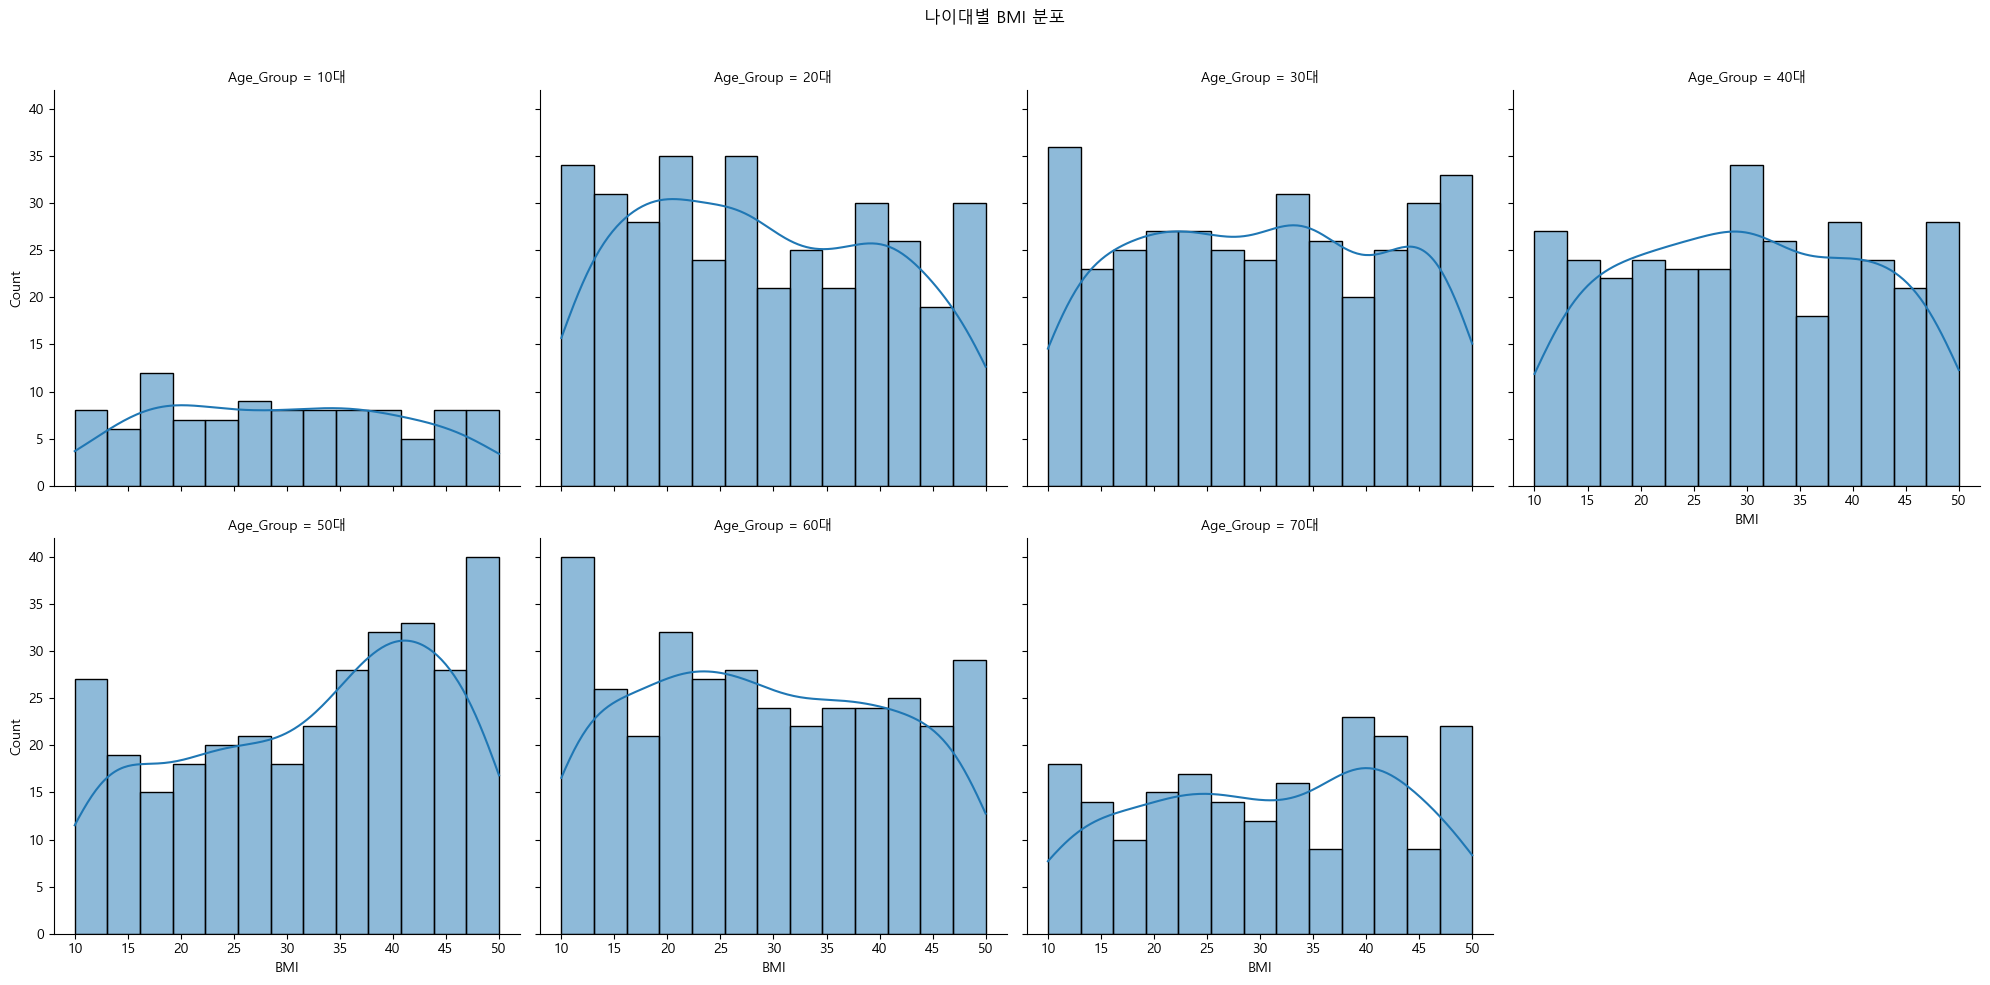

In [83]:
# 나이대 구간 만들기
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80], labels=['10대', '20대', '30대', '40대', '50대', '60대', '70대'])

# 나이대별로 BMI 분포 그리기
sns.displot(data=df, x="BMI", col="Age_Group", kde=True, col_wrap=4)
plt.subplots_adjust(top=0.9)
plt.suptitle('나이대별 BMI 분포')
plt.show()

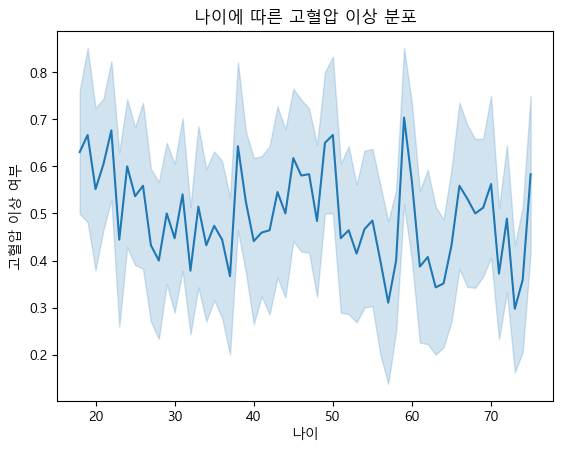

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.lineplot(data=df, x='Age', y='Blood_Pressure_Abnormality')
plt.title("나이에 따른 고혈압 이상 분포")
plt.xlabel("나이")
plt.ylabel("고혈압 이상 여부")
plt.show()

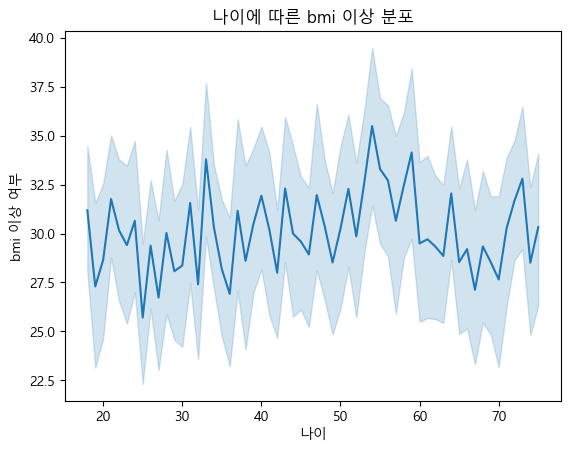

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

sns.lineplot(data=df, x='Age', y='BMI')
plt.title("나이에 따른 bmi 이상 분포")
plt.xlabel("나이")
plt.ylabel("bmi 이상 여부")
plt.show()

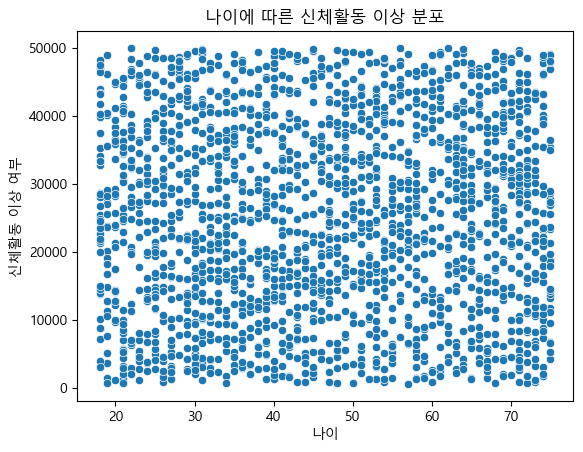

In [18]:
# scatter로 두개의 컬럼의 상관관계 그리기
# x축에 age, 나이에 따른 고혈압 이상여부 

# 산점도 그리기
sns.scatterplot(data=df, x='Age', y='Physical_activity')
plt.title("나이에 따른 신체활동 이상 분포")
plt.xlabel("나이")
plt.ylabel("신체활동 이상 여부")
plt.show()

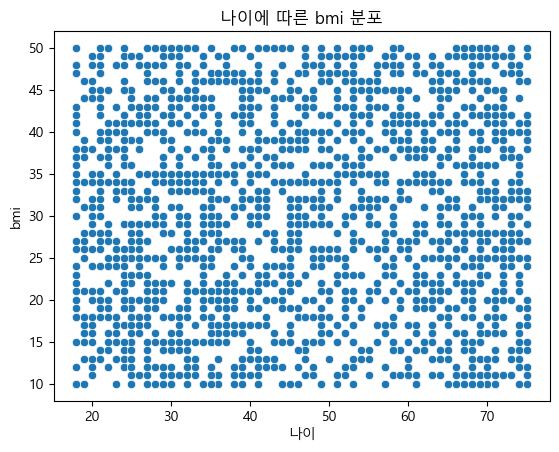

In [19]:
# 산점도 그리기
sns.scatterplot(data=df, x='Age', y='BMI')
plt.title("나이에 따른 bmi 분포")
plt.xlabel("나이")
plt.ylabel("bmi")
plt.show()

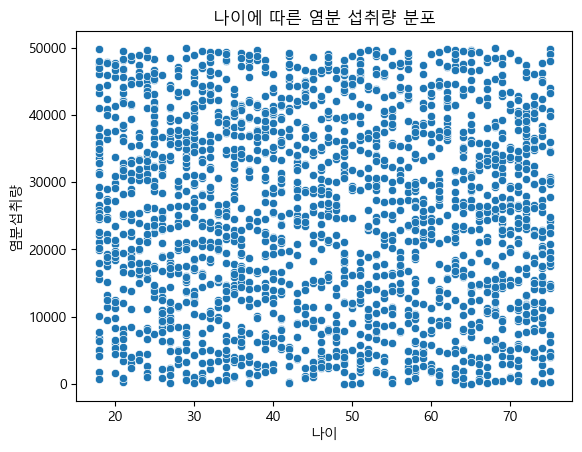

In [73]:
# 나이에 따른 염분 섭취량
sns.scatterplot(data=df, x='Age', y='salt_content_in_the_diet')
plt.title("나이에 따른 염분 섭취량 분포")
plt.xlabel("나이")
plt.ylabel("염분섭취량")
plt.show()

In [21]:
# heatmap 중요, boxplot, countplot, scatterplot, volinplot, hisplot

In [22]:
# 데이터와 타겟 분리
X = df.drop(columns=['Chronic_kidney_disease'], axis=1).values
y = df['Chronic_kidney_disease']

In [23]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 


((1600, 14), (400, 14), (1600,), (400,))

In [25]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.int64)

In [26]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

In [28]:
# 모델 정의
class diabetesEvaluationDense(nn.Module):
    def __init__(self):
        super(diabetesEvaluationDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 4 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = diabetesEvaluationDense()


In [29]:
# 손실 함수 및 최적화 기법 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [30]:
# 모델 학습
# 손실과 정확도 저장용 리스트
train_losses = []
test_accuracies = []

# 학습 루프
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()

        outputs = model(inputs).squeeze()  # 출력 shape 맞추기
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_dataloader))

    # 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs).squeeze()
            probs = torch.sigmoid(outputs)
            predicted = (probs > 0.5).int()

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: nan, Accuracy: 49.25%
Epoch 2/20, Loss: nan, Accuracy: 49.25%
Epoch 3/20, Loss: nan, Accuracy: 49.25%
Epoch 4/20, Loss: nan, Accuracy: 49.25%
Epoch 5/20, Loss: nan, Accuracy: 49.25%
Epoch 6/20, Loss: nan, Accuracy: 49.25%
Epoch 7/20, Loss: nan, Accuracy: 49.25%
Epoch 8/20, Loss: nan, Accuracy: 49.25%
Epoch 9/20, Loss: nan, Accuracy: 49.25%
Epoch 10/20, Loss: nan, Accuracy: 49.25%
Epoch 11/20, Loss: nan, Accuracy: 49.25%
Epoch 12/20, Loss: nan, Accuracy: 49.25%
Epoch 13/20, Loss: nan, Accuracy: 49.25%
Epoch 14/20, Loss: nan, Accuracy: 49.25%
Epoch 15/20, Loss: nan, Accuracy: 49.25%
Epoch 16/20, Loss: nan, Accuracy: 49.25%
Epoch 17/20, Loss: nan, Accuracy: 49.25%
Epoch 18/20, Loss: nan, Accuracy: 49.25%
Epoch 19/20, Loss: nan, Accuracy: 49.25%
Epoch 20/20, Loss: nan, Accuracy: 49.25%
Training complete.


In [31]:
# 모델 평가
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# Evaluation
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs).squeeze()
        probs = torch.sigmoid(outputs)
        predicted = (probs > 0.5).int()

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)

# Calculate specificity (for binary classification)
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')

Confusion Matrix:
[[197   0]
 [203   0]]
F1 Score: 0.00
Precision: 0.00
Recall: 0.00
Specificity: 1.00


C:\Users\Chick\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


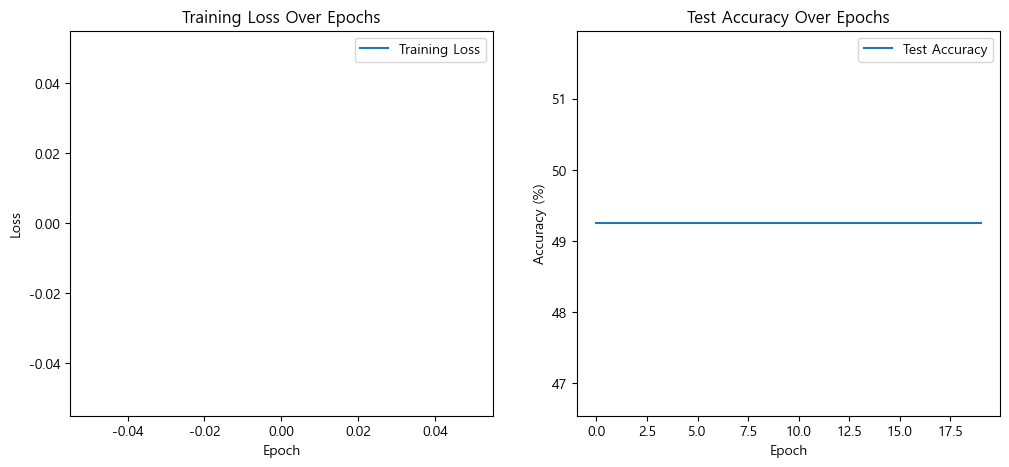

In [32]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()
